## 時間處理(Time Series)

- 時間戳記(timestamp)
- 固定時間(2021-1-1,2021-1,2021)
- 一段時間(起始-結束)

### Date and Time Data Types

- python提供內建3種module處理時間datatime,time,calendar

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 8, 23, 8, 43, 47, 384724)

In [3]:
now.year, now.month, now.day

(2023, 8, 23)

- datetime.timedelta 是提供儲存一段時間的類型

In [4]:
delta = datetime(2017,1,7) - datetime(2011, 6, 24, 8, 15)
delta

datetime.timedelta(days=2023, seconds=56700)

In [5]:
delta.days, delta.seconds

(2023, 56700)

 - 可以使用datatime和timedelta的數學運算來增加或減少時間

In [6]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字串和Datatime之間的轉換

#### 使用str(),datetime的方法strftime(),將時間轉成字串

%Y -> Four-digit year

%y -> Two-digit year

%m -> Two-digit month [01, 12] 

%d -> Two-digit day [01, 31]

%H -> Hour (24-hour clock) [00, 23]

%I -> Hour (12-hour clock) [01, 12]

%M Two-digit minute [00, 59]

%S Second [00, 61] (seconds 60, 61 account for leap seconds) 

%w Weekday as integer [0 (Sunday), 6]


In [8]:
stamp = datetime(2011, 1, 3)
str(stamp) , stamp.strftime("%Y-%m-%d")

('2011-01-03 00:00:00', '2011-01-03')

### 將字串轉成時間(datetime.strptime())

In [9]:
value = '2011-03-01'
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 3, 1, 0, 0)

In [10]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datatime.strptime()非常好使用，但每次要指定格式也是非常麻煩，可以使用第3方套件dateutil的parse方法

- pip install python-dateutil

In [11]:
from dateutil.parser import parse

parse('2011-01-03') , parse('Jan 31, 1997 10:15 PM')

(datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(1997, 1, 31, 22, 15))

- 在國際上有時會將日期放在前方，只要設定dayfirst=True來指示

In [12]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

#### pandas提供to_datetime方法，快速將包含時間字串(ISO8601)的list轉換為DatetimeIndex

In [13]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)
            

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

### Time Series的基礎操作

- 最常使用的是將Time Series常作index
- 建立Time Series時使用的是datetime物件或str

In [14]:
#將datetime放入list內
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2021,1,2),
         datetime(2021,1,5),
         datetime(2021,1,9),
         datetime(2021,1,13),
         datetime(2021,1,21)]
ts = pd.Series(np.random.randn(5),index=dates)
ts

2021-01-02    1.356476
2021-01-05    1.360363
2021-01-09   -0.558003
2021-01-13    1.157432
2021-01-21   -1.041616
dtype: float64

In [15]:
#DatetimeIndex
#注意freq=None,沒有固定的頻率
ts.index

DatetimeIndex(['2021-01-02', '2021-01-05', '2021-01-09', '2021-01-13',
               '2021-01-21'],
              dtype='datetime64[ns]', freq=None)

### 時間當作索引時,數學運算是使用有相同索引的內容互相運算

In [16]:
ts[::2]

2021-01-02    1.356476
2021-01-09   -0.558003
2021-01-21   -1.041616
dtype: float64

In [17]:
ts + ts[::2]

2021-01-02    2.712951
2021-01-05         NaN
2021-01-09   -1.116007
2021-01-13         NaN
2021-01-21   -2.083231
dtype: float64

### pandas內取出的時間物件是pandas內的Timestamp物件

In [18]:
stamp = ts.index[0]
display(stamp)
stamp.__class__

Timestamp('2021-01-02 00:00:00')

pandas._libs.tslibs.timestamps.Timestamp

### pandas的Timestamp物件的操作相似於datetime.datetime

In [19]:
stamp = ts.index[0]
stamp, stamp.year, stamp.day, stamp.hour, stamp.minute, stamp.second

(Timestamp('2021-01-02 00:00:00'), 2021, 2, 0, 0, 0)

In [20]:
stamp.strftime('%Y-%m-%d %X')

'2021-01-02 00:00:00'

### Indexing, Slection, Subsetting

In [21]:
ts

2021-01-02    1.356476
2021-01-05    1.360363
2021-01-09   -0.558003
2021-01-13    1.157432
2021-01-21   -1.041616
dtype: float64

In [22]:
#Timestamp當作索引

stamp=ts.index[2]
ts[stamp]

-0.5580034567314656

### 也可以使用時間字串(符合iso8601)當作索引

In [23]:
#時間字串當作索引
ts['2021-01-02'], ts['1/2/2021'], ts['20210102']

(1.3564756107353397, 1.3564756107353397, 1.3564756107353397)

### 自行建立有DateTime的索引
### 使用pd.date_range(),periods,freq,建立有指定長度和有頻率的Datetime索引 

In [24]:
#使用pd.date_range()建立長的Time Series 
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2019',periods=1000))
longer_ts

2019-01-01   -0.489000
2019-01-02    0.167878
2019-01-03   -0.258884
2019-01-04   -3.001346
2019-01-05   -0.228995
                ...   
2021-09-22    0.565192
2021-09-23   -0.751886
2021-09-24    1.268294
2021-09-25    0.809234
2021-09-26    1.126213
Freq: D, Length: 1000, dtype: float64

In [25]:
#只索引年份,會索引出所有該年份的row
longer_ts['2019']

2019-01-01   -0.489000
2019-01-02    0.167878
2019-01-03   -0.258884
2019-01-04   -3.001346
2019-01-05   -0.228995
                ...   
2019-12-27   -1.006166
2019-12-28    4.176724
2019-12-29    0.887016
2019-12-30    0.736260
2019-12-31   -0.088860
Freq: D, Length: 365, dtype: float64

In [26]:
#只索引年份和月份
longer_ts['2019-05']

2019-05-01    1.064086
2019-05-02    0.267983
2019-05-03    0.581139
2019-05-04    0.978540
2019-05-05    0.837740
2019-05-06    2.719814
2019-05-07   -0.807028
2019-05-08    0.119478
2019-05-09   -1.571754
2019-05-10    1.150924
2019-05-11   -1.113889
2019-05-12    0.989216
2019-05-13    1.552686
2019-05-14    2.616847
2019-05-15    0.406916
2019-05-16    0.555172
2019-05-17   -0.421152
2019-05-18   -1.187528
2019-05-19   -0.439742
2019-05-20    1.123338
2019-05-21   -0.422954
2019-05-22   -2.972330
2019-05-23    0.038841
2019-05-24    0.907950
2019-05-25    0.823587
2019-05-26    1.018010
2019-05-27   -0.046346
2019-05-28    0.869518
2019-05-29    1.720772
2019-05-30    1.509438
2019-05-31   -1.194579
Freq: D, dtype: float64

### 也可以使用datetime物件

In [27]:
#使用slicing
longer_ts[datetime(2021,1,1):]

2021-01-01   -0.513216
2021-01-02   -0.624265
2021-01-03   -1.098020
2021-01-04    0.328603
2021-01-05    0.477065
                ...   
2021-09-22    0.565192
2021-09-23   -0.751886
2021-09-24    1.268294
2021-09-25    0.809234
2021-09-26    1.126213
Freq: D, Length: 269, dtype: float64

### 注意不管是indexing還是slicing,全部是view,而不是copy新的一份,會更改到原始值

In [28]:
longer_ts['2021-1-1':'2021-3-31']

2021-01-01   -0.513216
2021-01-02   -0.624265
2021-01-03   -1.098020
2021-01-04    0.328603
2021-01-05    0.477065
                ...   
2021-03-27   -0.281709
2021-03-28   -0.328775
2021-03-29   -1.443185
2021-03-30    1.131995
2021-03-31   -0.249297
Freq: D, Length: 90, dtype: float64

In [29]:
#DataFrame
dates = pd.date_range('1/1/2021',periods=100,freq='W-WED') #查freq說明書有說明
long_df = pd.DataFrame(np.random.randn(100,4),
                      index = dates,
                      columns = ['台北','台中','高雄','花蓮'])
long_df

,台北,台中,高雄,花蓮
2021-01-06,-0.641485,-0.148232,0.238642,1.173640
2021-01-13,0.205896,0.370623,-0.453794,-0.799541
2021-01-20,0.036222,0.945579,-0.276663,0.185651
2021-01-27,1.725112,1.111319,-0.393486,-2.073959
2021-02-03,-0.130327,0.897158,0.152591,0.555967
...,...,...,...,...
2022-11-02,-0.491932,1.573605,1.178404,-0.285410
2022-11-09,1.855992,-0.425456,1.002960,-0.616678
2022-11-16,-0.486682,-0.322926,-0.764579,1.487810
2022-11-23,2.118630,-0.044236,-0.509734,0.804918


In [30]:
#使用loc
long_df.loc['2021-03']

,台北,台中,高雄,花蓮
2021-03-03,-0.236340,2.251844,0.893945,-0.282833
2021-03-10,1.683904,-0.353571,-1.481866,0.313446
2021-03-17,1.853897,-0.007289,0.191716,-1.047949
2021-03-24,0.986470,1.736924,-0.442780,0.236367
2021-03-31,2.590383,1.433820,1.670246,-0.684650


### 重複的Time Series

In [31]:
dates = pd.DatetimeIndex(['1/1/2021','1/2/2021','1/2/2021','1/2/2021','1/3/2021'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2021-01-01    0
2021-01-02    1
2021-01-02    2
2021-01-02    3
2021-01-03    4
dtype: int64

### 使用index的is_unique屬性檢查是不是都是唯一值

In [32]:
#檢查是否有重覆
dup_ts.index.is_unique

False

In [33]:
dup_ts['1/3/2021'], dup_ts['1/2/2021']

(4,
 2021-01-02    1
 2021-01-02    2
 2021-01-02    3
 dtype: int64)

### 檢查DatetimeIndex是否有重覆,使用groupby來整理重覆的資料
- step1:使用groupby(level0)
- step2:count()

In [34]:
#使用groupby()處理
grouped = dup_ts.groupby(level=0)
grouped.mean(), grouped.count()

(2021-01-01    0.0
 2021-01-02    2.0
 2021-01-03    4.0
 dtype: float64,
 2021-01-01    1
 2021-01-02    3
 2021-01-03    1
 dtype: int64)

## Date Range(時間範圍),Frequencies(頻率),Shifting(上下偏移)
一般在pandas的time series被假設為不規則的頻率,然而有時會為了滿足一些應用程式,必需要的是相同頻率的time series,必需額外使用一些pandas time series的工具,將不規則的頻率的轉換為相同頻率,這樣的轉換稱為resample

In [35]:
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2021,1,2),
         datetime(2021,1,5),
         datetime(2021,1,9),
         datetime(2021,1,13),
         datetime(2021,1,21)]
ts = pd.Series(np.random.randn(5),index=dates)
ts

2021-01-02   -0.836588
2021-01-05   -0.556704
2021-01-09   -1.339034
2021-01-13   -0.357827
2021-01-21    0.569236
dtype: float64

- 使用resample('D')
建立以日為頻率的time series

- ffill()
填滿沒有資料的索引

In [36]:
resampler = ts.resample('D')
resampler

### 建立 Date Range的time Series
- 使用pd.date_range()

In [37]:
#使用開始日期和結束日期
#預設以日為頻率
index = pd.date_range('2020-01-01','2022-06-01')
index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30',
               '2022-05-31', '2022-06-01'],
              dtype='datetime64[ns]', length=883, freq='D')

In [38]:
#使用開始日期和產生數量
pd.date_range('2021-01-01',periods=20)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
#使用結束日期和頻率
pd.date_range(end='2021-06-04', periods=20)

DatetimeIndex(['2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04'],
              dtype='datetime64[ns]', freq='D')

In [40]:
#產生一段時間頻率為每個月的工作日
pd.date_range('2010-01-01','2010-12-31',freq="BM")

DatetimeIndex(['2010-01-29', '2010-02-26', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-30', '2010-08-31',
               '2010-09-30', '2010-10-29', '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [41]:
#保留時間資訊
pd.date_range('2021-05-06 12:56:31', periods=20)

DatetimeIndex(['2021-05-06 12:56:31', '2021-05-07 12:56:31',
               '2021-05-08 12:56:31', '2021-05-09 12:56:31',
               '2021-05-10 12:56:31', '2021-05-11 12:56:31',
               '2021-05-12 12:56:31', '2021-05-13 12:56:31',
               '2021-05-14 12:56:31', '2021-05-15 12:56:31',
               '2021-05-16 12:56:31', '2021-05-17 12:56:31',
               '2021-05-18 12:56:31', '2021-05-19 12:56:31',
               '2021-05-20 12:56:31', '2021-05-21 12:56:31',
               '2021-05-22 12:56:31', '2021-05-23 12:56:31',
               '2021-05-24 12:56:31', '2021-05-25 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [42]:
#移除時間資訊
pd.date_range('2021-05-06 12:56:31', periods=20, normalize=True)

DatetimeIndex(['2021-05-06', '2021-05-07', '2021-05-08', '2021-05-09',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17',
               '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25'],
              dtype='datetime64[ns]', freq='D')

### Frequencies(頻率),Date Offsets(一般時間)

In [43]:
#Date Offsets
#M->月
#D->日
#H->小時
#3M -> 3個月
#6D -> 6日

pd.date_range('2010-01-01', '2010-01-03', freq='4H')

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 04:00:00',
               '2010-01-01 08:00:00', '2010-01-01 12:00:00',
               '2010-01-01 16:00:00', '2010-01-01 20:00:00',
               '2010-01-02 00:00:00', '2010-01-02 04:00:00',
               '2010-01-02 08:00:00', '2010-01-02 12:00:00',
               '2010-01-02 16:00:00', '2010-01-02 20:00:00',
               '2010-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [44]:
pd.date_range('2010-01-01','2010-01-02',freq='1h30min')

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:30:00',
               '2010-01-01 03:00:00', '2010-01-01 04:30:00',
               '2010-01-01 06:00:00', '2010-01-01 07:30:00',
               '2010-01-01 09:00:00', '2010-01-01 10:30:00',
               '2010-01-01 12:00:00', '2010-01-01 13:30:00',
               '2010-01-01 15:00:00', '2010-01-01 16:30:00',
               '2010-01-01 18:00:00', '2010-01-01 19:30:00',
               '2010-01-01 21:00:00', '2010-01-01 22:30:00',
               '2010-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

#### week of month dates

In [45]:
#每個月的第3個星期天
rng = pd.date_range('2021-01-01', '2022-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-02-19 00:00:00'),
 Timestamp('2021-03-19 00:00:00'),
 Timestamp('2021-04-16 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-07-16 00:00:00'),
 Timestamp('2021-08-20 00:00:00'),
 Timestamp('2021-09-17 00:00:00'),
 Timestamp('2021-10-15 00:00:00'),
 Timestamp('2021-11-19 00:00:00'),
 Timestamp('2021-12-17 00:00:00'),
 Timestamp('2022-01-21 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-03-18 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-05-20 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-07-15 00:00:00'),
 Timestamp('2022-08-19 00:00:00')]

### shifting(Leading and Lagging)Data - 向上偏移和向下偏移
#### 使用freq偏移時間

In [46]:
np.random.seed(123)
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2021-01-01', periods=4, freq='M'))
ts

2021-01-31   -1.085631
2021-02-28    0.997345
2021-03-31    0.282978
2021-04-30   -1.506295
Freq: M, dtype: float64

In [47]:
#向下偏移
ts.shift(2)

2021-01-31         NaN
2021-02-28         NaN
2021-03-31   -1.085631
2021-04-30    0.997345
Freq: M, dtype: float64

In [48]:
#向上偏移
ts.shift(-2)

2021-01-31    0.282978
2021-02-28   -1.506295
2021-03-31         NaN
2021-04-30         NaN
Freq: M, dtype: float64

In [49]:
#時間偏移常被拿來作為2個時間點的差或比例
#shift()不會移動index,所以可以使用運算,因為運算是以index為基礎來進行運算
#目前時間和上個時間的比例

ts / ts.shift(1) - 1

2021-01-31         NaN
2021-02-28   -1.918678
2021-03-31   -0.716268
2021-04-30   -6.323001
Freq: M, dtype: float64

In [50]:
#偏移時間索引,但values不會改變,使用freq='M',將會偏移時間一個月
ts.shift(1,freq='M')

2021-02-28   -1.085631
2021-03-31    0.997345
2021-04-30    0.282978
2021-05-31   -1.506295
Freq: M, dtype: float64

In [51]:
#偏移時間索引,但values不會改變,偏移時間3天
ts.shift(3, freq='D')

2021-02-03   -1.085631
2021-03-03    0.997345
2021-04-03    0.282978
2021-05-03   -1.506295
dtype: float64

In [52]:
#偏移時間索引,但values不會改變,偏移時間90分鐘
ts.shift(1, freq='90T')

2021-01-31 01:30:00   -1.085631
2021-02-28 01:30:00    0.997345
2021-03-31 01:30:00    0.282978
2021-04-30 01:30:00   -1.506295
dtype: float64

#### 使用offset 偏移時間


In [53]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2023, 8, 20)

#前移3天
now + 3 * Day()

Timestamp('2023-08-23 00:00:00')

In [54]:
#前移至月底
now + MonthEnd()

Timestamp('2023-08-31 00:00:00')

In [55]:
#前移至下個月底
now + MonthEnd(2)

Timestamp('2023-09-30 00:00:00')

In [56]:
#移至月底
#建立MonthEnd實體,再使用實體方法rollforward()
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2023-08-31 00:00:00')

In [57]:
#移至上個月底
#建立MonthEnd實體,再使用實體方法rollback()
offset = MonthEnd()
offset.rollback(now)

Timestamp('2023-07-31 00:00:00')

In [58]:
#使用groupby(),利用offset.rollfoward,function建立groupby物件

ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2023',periods=20,freq='4d')
               )
ts

2023-01-15   -0.578600
2023-01-19    1.651437
2023-01-23   -2.426679
2023-01-27   -0.428913
2023-01-31    1.265936
2023-02-04   -0.866740
2023-02-08   -0.678886
2023-02-12   -0.094709
2023-02-16    1.491390
2023-02-20   -0.638902
2023-02-24   -0.443982
2023-02-28   -0.434351
2023-03-04    2.205930
2023-03-08    2.186786
2023-03-12    1.004054
2023-03-16    0.386186
2023-03-20    0.737369
2023-03-24    1.490732
2023-03-28   -0.935834
2023-04-01    1.175829
Freq: 4D, dtype: float64

In [59]:
#所有時間移至當月的月底,再做groupby
offset = MonthEnd()
ts.groupby(offset.rollforward).mean()

2023-01-31   -0.103364
2023-02-28   -0.238026
2023-03-31    1.010746
2023-04-30    1.175829
dtype: float64

In [60]:
### 上面的groupby的動作可以更改為resample()
### 使用resample()計算每個月或每天每年的計算
ts.resample('M').mean()

2023-01-31   -0.103364
2023-02-28   -0.238026
2023-03-31    1.010746
2023-04-30    1.175829
Freq: M, dtype: float64

In [61]:
resampler = ts.resample('D')
resampler.ffill()

2023-01-15   -0.578600
2023-01-16   -0.578600
2023-01-17   -0.578600
2023-01-18   -0.578600
2023-01-19    1.651437
                ...   
2023-03-28   -0.935834
2023-03-29   -0.935834
2023-03-30   -0.935834
2023-03-31   -0.935834
2023-04-01    1.175829
Freq: D, Length: 77, dtype: float64

### 時區的處理
#### IANA time zone of Taiwan
- Asia/Taipei

In [62]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [63]:
tz = pytz.timezone('Asia/Taipei')
tz

<DstTzInfo 'Asia/Taipei' LMT+8:06:00 STD>

#### 時區的轉換
- time Series預設是沒有時區的

In [64]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -1.253881
2012-03-10 09:30:00   -0.637752
2012-03-11 09:30:00    0.907105
2012-03-12 09:30:00   -1.428681
2012-03-13 09:30:00   -0.140069
2012-03-14 09:30:00   -0.861755
Freq: D, dtype: float64

In [65]:
#預設時區是None
print(ts.index.tz)

None


In [66]:
#建立有時區的DatetimeIndex
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='Asia/Taipei')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00',
               '2012-03-15 09:30:00+08:00', '2012-03-16 09:30:00+08:00',
               '2012-03-17 09:30:00+08:00', '2012-03-18 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Taipei]', freq='D')

#### 將無時區的時間,轉換為有時間的時區

In [67]:
ts

2012-03-09 09:30:00   -1.253881
2012-03-10 09:30:00   -0.637752
2012-03-11 09:30:00    0.907105
2012-03-12 09:30:00   -1.428681
2012-03-13 09:30:00   -0.140069
2012-03-14 09:30:00   -0.861755
Freq: D, dtype: float64

In [68]:
#本沒有時區資訊轉換為有時區,使用tz_localize()
ts_taiwan = ts.tz_localize('Asia/Taipei')
ts_taiwan

2012-03-09 09:30:00+08:00   -1.253881
2012-03-10 09:30:00+08:00   -0.637752
2012-03-11 09:30:00+08:00    0.907105
2012-03-12 09:30:00+08:00   -1.428681
2012-03-13 09:30:00+08:00   -0.140069
2012-03-14 09:30:00+08:00   -0.861755
dtype: float64

In [69]:
#本沒有時區資訊轉換為有時區,使用tz_localize()
ts_utc = ts.tz_localize('UTC')
display(ts_utc)
display(ts_utc.index)
#將現有的時區,轉換為其它時區tz_convert()
ts_New_York = ts_taiwan.tz_convert('America/New_York')
ts_New_York

2012-03-09 09:30:00+00:00   -1.253881
2012-03-10 09:30:00+00:00   -0.637752
2012-03-11 09:30:00+00:00    0.907105
2012-03-12 09:30:00+00:00   -1.428681
2012-03-13 09:30:00+00:00   -0.140069
2012-03-14 09:30:00+00:00   -0.861755
Freq: D, dtype: float64

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

2012-03-08 20:30:00-05:00   -1.253881
2012-03-09 20:30:00-05:00   -0.637752
2012-03-10 20:30:00-05:00    0.907105
2012-03-11 21:30:00-04:00   -1.428681
2012-03-12 21:30:00-04:00   -0.140069
2012-03-13 21:30:00-04:00   -0.861755
dtype: float64

In [70]:
#將pd.Timestamp轉換時區
#Timestamp類別

stamp = pd.Timestamp('2011-03-12 04:00')
display(stamp) #沒有時區
stamp_utc=stamp.tz_localize('UTC') #加上時區
stamp_utc

Timestamp('2011-03-12 04:00:00')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [71]:
#將有utc時區的資料使用tz_convert()轉換至該時區的時間
stamp_taipei = stamp_utc.tz_convert('Asia/Taipei')
stamp_taipei

Timestamp('2011-03-12 12:00:00+0800', tz='Asia/Taipei')

## Periods and Period Arithmetic
- 代表一段時間,如1天,4天,1個月,1年

In [85]:
p = pd.Period('2007', freq='A-DEC') #表示以12月作為結束的一整年,這裏表示從2007-01-01到2017-12-31的全年
p

Period('2007', 'A-DEC')

In [87]:
#可以偏移時間區間
display(p + 5)
display(p - 2)

Period('2012', 'A-DEC')

Period('2005', 'A-DEC')

In [89]:
#2個相同頻率,可以相減
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

### pd.period_range(),可以建立規則的時區範圍

In [92]:
rng = pd.period_range('1/1/2023','6/30/2023', freq='M') #建立2023/1/1日至2023/6/300所有月份的Period
pd.Series(np.random.randn(6),index=rng)

2023-01    1.267299
2023-02    0.332765
2023-03    0.556549
2023-04   -0.212080
2023-05    0.456271
2023-06    1.544544
Freq: M, dtype: float64

In [94]:
# PeriodIndex,可以使用字串建立一段時間
values = ['2001Q1','2001Q2','2001Q3', '2001Q4']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q1', '2001Q2', '2001Q3', '2001Q4'], dtype='period[Q-DEC]')

## 時期的頻率轉換

In [96]:
p = pd.Period('2023',freq='A-DEC') #2023-01-01至2023-21-31
p

Period('2023', 'A-DEC')

In [100]:
display(p.asfreq('M',how='start'))##2023-01-01至2023-21-31,轉換為月2023-01
#也可以單獨建立
pd.Period('2023-01',freq='M')

Period('2023-01', 'M')

Period('2023-01', 'M')

In [101]:
display(p.asfreq('M',how='end'))##2023-01-01至2023-21-31,轉換為月2023-12
#也可以單獨建立
pd.Period('2023-12',freq='M')

Period('2023-12', 'M')

Period('2023-12', 'M')

#### PeriodIndex或TimeSeries的頻率轉換方式相同

In [102]:
rng = pd.period_range('2006','2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.239669
2007    0.143308
2008    0.253816
2009    0.283725
Freq: A-DEC, dtype: float64

In [103]:
ts.asfreq('M', how='start')

2006-01   -0.239669
2007-01    0.143308
2008-01    0.253816
2009-01    0.283725
Freq: M, dtype: float64

In [104]:
ts.asfreq('B', how='end')

2006-12-29   -0.239669
2007-12-31    0.143308
2008-12-31    0.253816
2009-12-31    0.283725
Freq: B, dtype: float64

#### 季度運算至TimeSeries


In [105]:
rng = pd.period_range('2011Q3','2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)),index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

#### DateTimeIndex 和 Pediod的相互轉換

In [106]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.411889
2000-02-29   -1.876869
2000-03-31   -1.019655
Freq: M, dtype: float64

In [107]:
#使用to_period()轉換
pts = ts.to_period()
pts

2000-01   -1.411889
2000-02   -1.876869
2000-03   -1.019655
Freq: M, dtype: float64

In [109]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
display(ts2)
ts2.to_period('M')

2000-01-29   -0.193964
2000-01-30    0.134027
2000-01-31    0.704474
2000-02-01    0.665653
2000-02-02   -0.898423
2000-02-03    1.523664
Freq: D, dtype: float64

2000-01   -0.193964
2000-01    0.134027
2000-01    0.704474
2000-02    0.665653
2000-02   -0.898423
2000-02    1.523664
Freq: M, dtype: float64

In [115]:
#periodIndex使用to_timestamp()轉換為timestamp
display(pts)
pts.to_timestamp(how='end')

2000-01   -1.411889
2000-02   -1.876869
2000-03   -1.019655
Freq: M, dtype: float64

2000-01-31 23:59:59.999999999   -1.411889
2000-02-29 23:59:59.999999999   -1.876869
2000-03-31 23:59:59.999999999   -1.019655
dtype: float64

In [116]:
year = [2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018]
quarter = [1, 2, 3, 4, 1, 2, 3, 4]
index = pd.PeriodIndex(year=year, quarter=quarter, freq='Q-DEC')
index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
             '2018Q3', '2018Q4'],
            dtype='period[Q-DEC]')

### Resampling 和 頻率(Frequency)的轉換
- resample()就是從現有的頻率轉換為另一個頻率
- downsampling就是從比較高的頻率轉換為比較低的頻率
- upsampling就是從比較低的頻率轉換為比較高的頻率
- resample的操作類似groupby的操作

In [72]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01   -0.255619
2000-01-02   -2.798589
2000-01-03   -1.771533
2000-01-04   -0.699877
2000-01-05    0.927462
                ...   
2000-04-05   -0.270232
2000-04-06    0.812341
2000-04-07    0.499740
2000-04-08    0.474347
2000-04-09   -0.563924
Freq: D, Length: 100, dtype: float64

In [73]:
ts.resample('M').mean()

2000-01-31    0.111995
2000-02-29   -0.054910
2000-03-31   -0.050308
2000-04-30    0.319758
Freq: M, dtype: float64

In [74]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [75]:
#'B'->business day
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

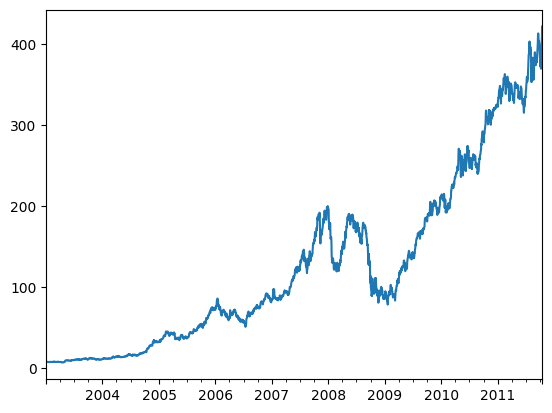

In [76]:
import matplotlib.pyplot as plt
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.AAPL.plot(ax=axes)


<Axes: >

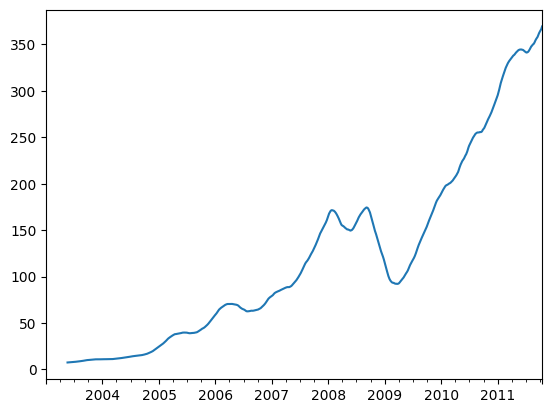

In [77]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.AAPL.rolling(100).mean().plot(ax=axes) #rolling滾動計算100天的平均,rolling是為了讓線條比較平滑

In [78]:
close_px.AAPL.rolling(250).mean()[:250] #使用rolling()前面250筆會變成None

2003-01-02       NaN
2003-01-03       NaN
2003-01-06       NaN
2003-01-07       NaN
2003-01-08       NaN
               ...  
2003-12-11       NaN
2003-12-12       NaN
2003-12-15       NaN
2003-12-16       NaN
2003-12-17    9.2234
Freq: B, Name: AAPL, Length: 250, dtype: float64

In [79]:
close_px.AAPL.rolling(250,min_periods=10).mean()[:20] #使用min_periods會讓前面的None比較少

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    7.355000
2003-01-16    7.350909
2003-01-17    7.325833
2003-01-20    7.304615
2003-01-21    7.283571
2003-01-22    7.260667
2003-01-23    7.250000
2003-01-24    7.229412
2003-01-27    7.220556
2003-01-28    7.224211
2003-01-29    7.236500
Freq: B, Name: AAPL, dtype: float64

In [80]:
apple_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
apple_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<Axes: >

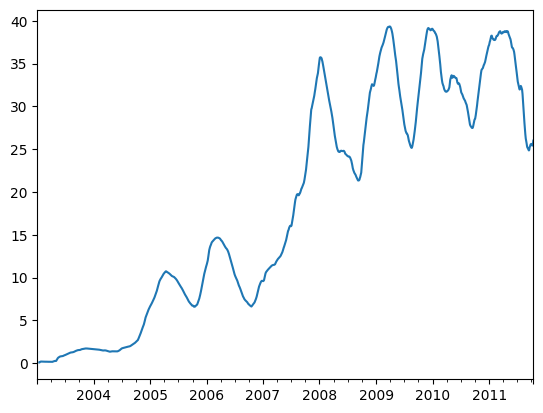

In [81]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
apple_std250.plot(ax=axes) #下圖解釋為每250天的平均差

<Axes: >

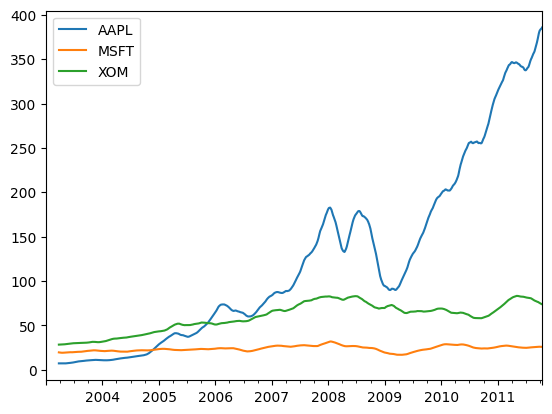

In [82]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px.rolling(60).mean().plot(ax=axes) #每60天的平均

<Axes: >

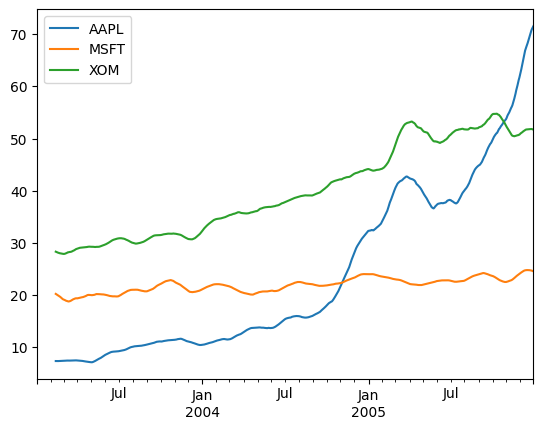

In [83]:
figure = plt.figure()
axes=figure.add_subplot(1,1,1)
close_px['2003':'2005'].rolling(30).mean().plot(ax=axes)